# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from joblib import dump

# Loading CSV File

In [2]:
dataset = pd.read_csv("ipl_colab.csv")
print(f" Data Imported | Shape: {dataset.shape}")

 Data Imported | Shape: (76014, 15)


# Data Overview

1. First 5 rows

In [3]:
print("\nFirst 5 rows:")
dataset.head()


First 5 rows:


,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


2. Statistical summary of numeric features

In [4]:
# Describing Numerical Values of the Dataset
dataset.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


3. Checking null types and doc counts for all values

In [5]:
# Information about Each Column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   batting_team    76014 non-null  object 
 4   bowling_team    76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


4. Getting unique value counts, dtypes and column names

In [6]:
# Unique values and datatypes
print(dataset.nunique())
print(dataset.dtypes)
print(dataset.columns)

mid               617
date              442
venue              35
batting_team       14
bowling_team       14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64
mid                 int64
date               object
venue              object
batting_team       object
bowling_team       object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object
Index(['mid', 'date', 'venue', 'batting_team', 'bowling_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non-striker', 'total'],
      dtype='object')


# Data Cleaning

1. Removing irrelevant features from dataset

In [7]:
# Remove Irrelevant Columns (keeping more relevant ones for winner prediction)
to_drop = ['mid','date','venue','batsman','bowler','striker','non-striker']
print("Before Drop:", dataset.shape)
dataset = dataset.drop(to_drop, axis=1)
print("After Drop:", dataset.shape)

Before Drop: (76014, 15)
After Drop: (76014, 8)


2. Filtering records to keep only consistent ipl teams

In [8]:
valid_teams = ['Kolkata Knight Riders','Chennai Super Kings','Rajasthan Royals',
               'Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore',
               'Delhi Daredevils','Sunrisers Hyderabad']
print("Before team filter:", dataset.shape)
dataset = dataset[dataset['batting_team'].isin(valid_teams) & dataset['bowling_team'].isin(valid_teams)]
print("After team filter:", dataset.shape)

Before team filter: (76014, 8)
After team filter: (53811, 8)


3. Removing enteries where count is less than 5

In [9]:
# Remove data before 5 overs
print("Before over filter:", dataset.shape)
dataset = dataset[dataset['overs'] >= 5.0]
print("After over filter:", dataset.shape)

Before over filter: (53811, 8)
After over filter: (40108, 8)


# Visualizing correlations among numeric columns.

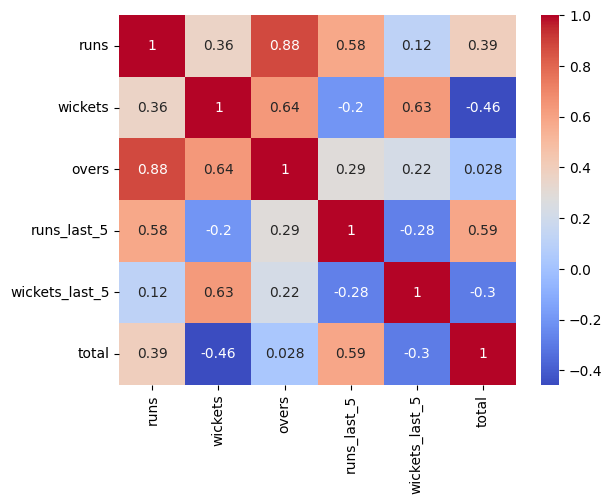

In [10]:
numeric_data = dataset.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.show()

# Preprocessing and Encoding

1. Encoding categorical team columns into numeric values.



In [11]:
le = LabelEncoder()
for col in ['batting_team','bowling_team']:
    dataset[col] = le.fit_transform(dataset[col])
dataset.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


2. Applying one-hot encoding and creating a transformed DataFrame


In [12]:
# One-hot encoding
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1])], remainder='passthrough')
transformed_data = np.array(ct.fit_transform(dataset))

# Renaming columns
columns = ['batting_team_CS','batting_team_DD','batting_team_KXIP','batting_team_KKR',
           'batting_team_MI','batting_team_RR','batting_team_RCB','batting_team_SH',
           'bowling_team_CS','bowling_team_DD','bowling_team_KXIP','bowling_team_KKR',
           'bowling_team_MI','bowling_team_RR','bowling_team_RCB','bowling_team_SH',
           'runs','wickets','overs','runs_last_5','wickets_last_5','total']
df = pd.DataFrame(transformed_data, columns=columns)
df.head()


,batting_team_CS,batting_team_DD,batting_team_KXIP,batting_team_KKR,batting_team_MI,batting_team_RR,batting_team_RCB,batting_team_SH,bowling_team_CS,bowling_team_DD,...,bowling_team_MI,bowling_team_RR,bowling_team_RCB,bowling_team_SH,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0


3. Separating features/labels and splitting into train/test sets

In [13]:
# Split features and target
X = df.drop('total', axis=1)
y = df['total']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)
print("Train:",X_train.shape,"| Test:",X_test.shape)

Train: (32086, 21) | Test: (8022, 21)


# Training & evaluation

Defines a helper function to train and evaluate any model quickly

In [14]:
# Helper function to train & evaluate
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    train_acc = round(model.score(X_train,y_train)*100,2)
    test_acc = round(model.score(X_test,y_test)*100,2)
    print(f"{name} -> Train:{train_acc}% | Test:{test_acc}%")
    print(f"MAE: {mean_absolute_error(y_test, model.predict(X_test))}")
    mse = mean_squared_error(y_test, model.predict(X_test))
    print(f"MSE: {mse} | RMSE: {np.sqrt(mse)}")
    return test_acc

# Training and evaluating six different regression models.

1. Decision Tree

In [15]:
# Decision Tree
tree_model = DecisionTreeRegressor()
tree_acc = evaluate_model("DecisionTree", tree_model)

DecisionTree -> Train:99.99% | Test:85.82%
MAE: 3.981737721266517
MSE: 126.78163176265271 | RMSE: 11.259734977460736


2. Linear Regression

In [16]:
# Linear Regression
lin_model = LinearRegression()
lin_acc = evaluate_model("LinearRegression", lin_model)

LinearRegression -> Train:65.7% | Test:66.79%
MAE: 12.953979750170337
MSE: 296.8783233378874 | RMSE: 17.23015737995122


3. Random Forest

In [17]:
# Random Forest
forest_model = RandomForestRegressor(n_estimators=120, random_state=42)
forest_acc = evaluate_model("RandomForest", forest_model)

RandomForest -> Train:99.05% | Test:93.54%
MAE: 4.442105455038327
MSE: 57.75196726945478 | RMSE: 7.599471512510247


4. Lasso Regression

In [18]:
# Lasso Regression
lasso_model = LassoCV()
lasso_acc = evaluate_model("LassoCV", lasso_model)

LassoCV -> Train:64.71% | Test:65.8%
MAE: 12.987000098936154
MSE: 305.7241672599618 | RMSE: 17.48496975290383


5. Support Vector Regression

In [19]:
# Support Vector Regression
svm_model = SVR()
svm_acc = evaluate_model("SVR", svm_model)

SVR -> Train:57.18% | Test:58.26%
MAE: 14.609055295865371
MSE: 373.12511714479376 | RMSE: 19.31644680433733


6. Neural Network

In [20]:
# Neural Network
mlp_model = MLPRegressor(activation='relu', max_iter=500)
mlp_acc = evaluate_model("MLPRegressor", mlp_model)

MLPRegressor -> Train:78.18% | Test:78.0%
MAE: 10.415333074486979
MSE: 196.6514705395659 | RMSE: 14.023247503326964


# Visualization

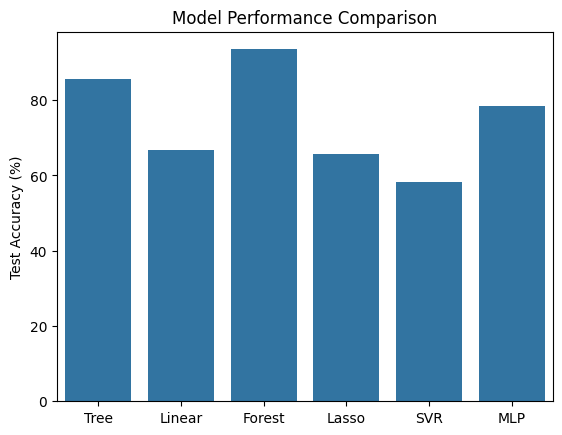

In [22]:
# Compare model performances
results = {"Tree":tree_acc,"Linear":lin_acc,"Forest":forest_acc,"Lasso":lasso_acc,"SVR":svm_acc,"MLP":mlp_acc}
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Performance Comparison")
plt.ylabel("Test Accuracy (%)")
plt.show()

# Prediction

Function to predict score given match parameters using the trained model.



In [23]:
# Predict function using chosen model (RandomForest)
def predict_score(bat_team, bowl_team, runs, wickets, overs, runs_last5, wickets_last5, model=forest_model):
    team_map = ['Chennai Super Kings','Delhi Daredevils','Kings XI Punjab','Kolkata Knight Riders',
                'Mumbai Indians','Rajasthan Royals','Royal Challengers Bangalore','Sunrisers Hyderabad']
    encoding = [0]*8
    encoding[team_map.index(bat_team)] = 1
    encoding_bowl = [0]*8
    encoding_bowl[team_map.index(bowl_team)] = 1
    features = encoding + encoding_bowl + [runs,wickets,overs,runs_last5,wickets_last5]
    return int(round(model.predict([features])[0]))

# Testing Prediction

In [24]:
print("Predicted Score: DD v/s CSK :- ", predict_score("Delhi Daredevils","Chennai Super Kings",68,3,10.2,29,1))
print("Predicted Score: MI v/s KXIP:- ", predict_score("Mumbai Indians","Kings XI Punjab",113,2,12.3,55,0))

Predicted Score: DD v/s CSK :-  147
Predicted Score: MI v/s KXIP:-  185


C:\Users\ashit\OneDrive\Projects\IPL_SCORE_PREDICTOR\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ashit\OneDrive\Projects\IPL_SCORE_PREDICTOR\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Saving Models

In [ ]:
dump(forest_model, "rf_model.pkl")
dump(tree_model, "dt_model.pkl")
dump(mlp_model, "mlp_model.pkl")

['mlp_model.pkl']